In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
X = df.drop(columns=["diagnosis", "Unnamed: 32"])
X.head()
y = df.iloc[:,1]
y.head()

# total X and y
print(X.shape)
print(y.shape)

(569, 31)
(569,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (455, 31)
X_test shape: (114, 31)
y_train shape: (455,)
y_test shape: (114,)


In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
dtc = DecisionTreeClassifier(random_state=42)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [34]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67  4]
 [ 3 40]]
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [36]:
importances = dtc.feature_importances_
print(importances)
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

[0.         0.         0.03080835 0.         0.         0.
 0.         0.         0.69141955 0.00806885 0.         0.
 0.         0.         0.01198257 0.00123678 0.         0.
 0.01593081 0.00627578 0.01855447 0.05229927 0.03704562 0.05149396
 0.         0.00923319 0.         0.         0.06565079 0.
 0.        ]
id: 0.0
radius_mean: 0.0
texture_mean: 0.03080835248667417
perimeter_mean: 0.0
area_mean: 0.0
smoothness_mean: 0.0
compactness_mean: 0.0
concavity_mean: 0.0
concave points_mean: 0.6914195549049809
symmetry_mean: 0.008068854222700378
fractal_dimension_mean: 0.0
radius_se: 0.0
texture_se: 0.0
perimeter_se: 0.0
area_se: 0.011982573676838769
smoothness_se: 0.0012367800829339453
compactness_se: 0.0
concavity_se: 0.0
concave points_se: 0.015930814747382796
symmetry_se: 0.0062757755065447375
fractal_dimension_se: 0.018554466715001834
radius_worst: 0.05229926933685694
texture_worst: 0.03704561727763226
perimeter_worst: 0.051493960584869665
area_worst: 0.0
smoothness_worst: 0.00923319

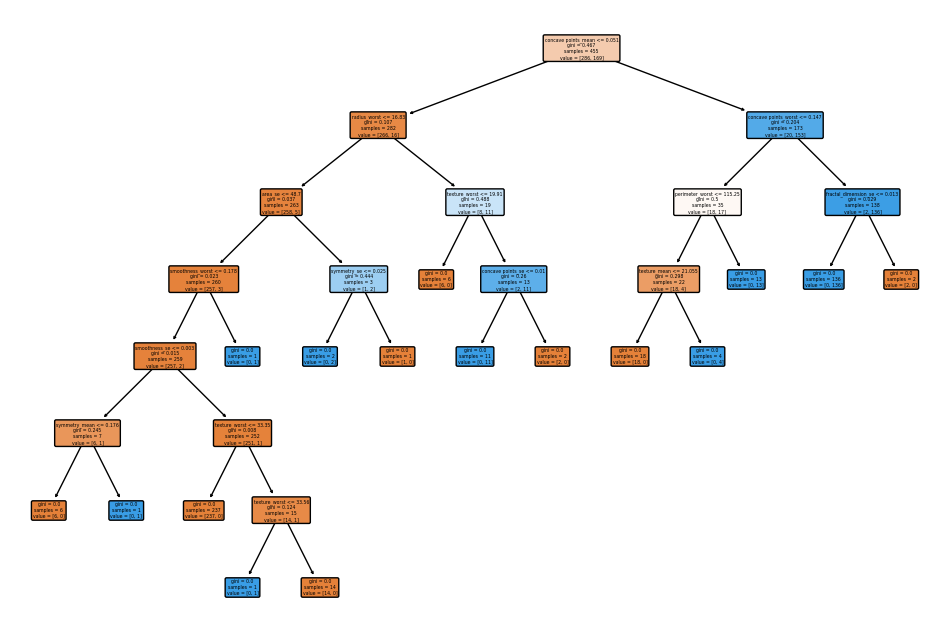

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [37]:
import graphviz
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(dtc, filled=True, feature_names=X.columns, rounded=True)
plt.show()

dot_data = export_graphviz(dtc,out_file=None,feature_names=X.columns,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()